<a href="https://colab.research.google.com/github/zhaoxuan00707/zhaoxuan00707/blob/master/test_function_family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(19680801)
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
from torch.utils.data import DataLoader

In [ ]:
#define the functions of SCM; f1 is binomial, f2 is normal and f3 is square

def f1():
    return np.random.binomial(n=1, p=0.3)


def f2(x1):
    return np.random.normal(loc=x1, scale=0.1)+1


def f3(x2):
    return x2 ** 2

#generate the datasaet with a sample size of 100000

dataset=[]
x1_tensor=[]
x2_tensor=[]
x3_tensor=[]
for i in range(100000):
    x1 = f1()
    x2 = f2(x1)
    x3 = f3(x2)
    dataset.append([x1,x2,x3])
    x1_tensor.append([x1])
    x2_tensor.append([x2])
    x3_tensor.append([x3])



x1_tensor = torch.as_tensor(x1)
x2_tensor=torch.as_tensor(x2)
x3_tensor=torch.as_tensor(x3)
dataset = torch.as_tensor(dataset)
print(dataset.shape)


#define the neural nets to mimick f2 and f3

class X2_nets(nn.Module):
    def __init__(self):
        super(X2_nets, self).__init__()
        self.main = nn.Sequential(
                                  nn.Linear(1, 10),

                                  nn.ReLU(),
                                  nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1))

    def forward(self, x):
        x= self.main(x)

        return x

class X3_nets(nn.Module):
    def __init__(self):
        super(X3_nets, self).__init__()
        self.main = nn.Sequential(
                                  nn.Linear(1, 10),

                                  nn.ReLU(),
                                  nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1))

    def forward(self, x):
        x= self.main(x)

        return x

'''class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
                                  nn.Linear(3, 25),

                                  nn.ReLU(),
                                  nn.Linear(25, 12),
            nn.ReLU(),
            nn.Linear(12, 6),
            nn.ReLU(),
            nn.Linear(6, 1),
            #nn.Sigmoid()



                                  )

    def forward(self, x):
        x= self.main(x)

        return x'''

#initialization of the neural netss
x2_nets=X2_nets()
x3_nets=X3_nets()
#discriminator=Discriminator()


#define the loss
def mse_loss(input, target):
    #print('weight',weight.view(1,-1).shape)
    #print('squre',((input - target) ** 2).shape)

    #return torch.sum(torch.t(weight.view(1,-1)) * (input - target) ** 2)
    return torch.sum((input - target) ** 2)


#the function of training one batch
def train_f(data):
    optimizer= optim.Adam([{'params': x2_nets.parameters()},
                           {'params': x3_nets.parameters()},
                     ],


                            lr=0.001)  # , momentum=0.9)
    optimizer.zero_grad()

    x1_tensor= data[:, 0:1]
    x2_tensor=data[:,1:2]
    x3_tensor=data[:,2:3]


    x2_out = x2_nets(x1_tensor)


    x3_out = x3_nets(x2_out)



    input=data
    #print(input.shape)
    target=torch.cat((x1_tensor,x2_out,x3_out), 1)
    #print(target.shape)





    #loss=nn.MSELoss()
    output = mse_loss(input.float(), target.float())
    output=output/1000
    output.backward()
    optimizer.step()
    return output

torch.Size([100000, 3])


In [ ]:
train_loader = DataLoader(dataset, batch_size=1000, shuffle=True)


#train the neural nets of f2 and f3
for epoch in range(30):
    loss_f=0
    #loss_d=0
    i=-1
    for data in train_loader:
        i=i+1
        x=data

        #if i%2==0:
        #a,b=train_discriminator(x,y)
        #print('b',b.shape)
        #loss_d += a
        loss_f += train_f(x)
    print(epoch, loss_f)


#to get the output of the neural nets
x1_tensor= dataset[:, 0:1]
print(x1_tensor.shape)

x2_out = x2_nets(x1_tensor)
print(x2_out.shape)


x3_out = x3_nets(x2_out)





    #print(input.shape)
target=torch.cat((x1_tensor,x2_out,x3_out), 1)

0 tensor(465.2038, grad_fn=<AddBackward0>)
1 tensor(259.6102, grad_fn=<AddBackward0>)
2 tensor(179.4922, grad_fn=<AddBackward0>)
3 tensor(115.0811, grad_fn=<AddBackward0>)
4 tensor(39.5144, grad_fn=<AddBackward0>)
5 tensor(16.1280, grad_fn=<AddBackward0>)
6 tensor(10.7356, grad_fn=<AddBackward0>)
7 tensor(9.5759, grad_fn=<AddBackward0>)
8 tensor(9.2235, grad_fn=<AddBackward0>)
9 tensor(8.9891, grad_fn=<AddBackward0>)
10 tensor(8.8901, grad_fn=<AddBackward0>)
11 tensor(8.8341, grad_fn=<AddBackward0>)
12 tensor(8.7698, grad_fn=<AddBackward0>)
13 tensor(8.7624, grad_fn=<AddBackward0>)
14 tensor(8.7567, grad_fn=<AddBackward0>)
15 tensor(8.7450, grad_fn=<AddBackward0>)
16 tensor(8.7330, grad_fn=<AddBackward0>)
17 tensor(8.6989, grad_fn=<AddBackward0>)
18 tensor(8.6985, grad_fn=<AddBackward0>)
19 tensor(8.6923, grad_fn=<AddBackward0>)
20 tensor(8.6886, grad_fn=<AddBackward0>)
21 tensor(8.6620, grad_fn=<AddBackward0>)
22 tensor(8.6645, grad_fn=<AddBackward0>)
23 tensor(8.6601, grad_fn=<AddBac

In [ ]:
a = dataset[:1000,:] #to calculate MMD, we use only 1000 samples, otherwise google colab dont allow the high computation
b = target[:1000,:]


In [ ]:
def mmd(x, y, sigma):
    # compare kernel MMD paper and code:
    # A. Gretton et al.: A kernel two-sample test, JMLR 13 (2012)
    # http://www.gatsby.ucl.ac.uk/~gretton/mmd/mmd.htm
    # x shape [n, d] y shape [m, d]
    # n_perm number of bootstrap permutations to get p-value, pass none to not get p-value
    n, d = x.shape
    m, d2 = y.shape
    assert d == d2
    xy = torch.cat([x.detach(), y.detach()], dim=0)
    dists = torch.cdist(xy, xy, p=2.0)
    # we are a bit sloppy here as we just keep the diagonal and everything twice
    # note that sigma should be squared in the RBF to match the Gretton et al heuristic
    k = torch.exp((-1/(2*sigma**2)) * dists**2) + torch.eye(n+m)*1e-5
    k_x = k[:n, :n]
    k_y = k[n:, n:]
    k_xy = k[:n, n:]
    # The diagonals are always 1 (up to numerical error, this is (3) in Gretton et al.)
    # note that their code uses the biased (and differently scaled mmd)
    mmd = k_x.sum() / (n * (n - 1)) + k_y.sum() / (m * (m - 1)) - 2 * k_xy.sum() / (n * m)
    return mmd

In [ ]:
dists = torch.pdist(torch.cat([a, b], dim=0))
sigma = dists[:100].median()/2
our_mmd = mmd(a, b, sigma)
our_mmd

tensor(0.0015, grad_fn=<SubBackward0>)

In [ ]:
import tqdm

In [ ]:
N_X = len(a[:1000,:])
N_X

1000

In [ ]:
N_X = len(a)
N_Y = len(b)
xy = torch.cat([a, b], dim=0).double()

mmds = []
for i in tqdm.tqdm(range(1000)):
    xy = xy[torch.randperm(len(xy))]
    mmds.append(mmd(xy[:N_X], xy[N_X:], sigma).item())
mmds = torch.tensor(mmds)

100%|██████████| 1000/1000 [01:10<00:00, 14.17it/s]


(array([557., 164.,  82.,  49.,  49.,  31.,  20.,  18.,   8.,   6.,   4.,
          2.,   1.,   2.,   2.,   1.,   0.,   2.,   1.,   1.]),
 array([0.00126859, 0.00167821, 0.00208783, 0.00249745, 0.00290707,
        0.00331669, 0.00372632, 0.00413594, 0.00454556, 0.00495518,
        0.0053648 , 0.00577442, 0.00618405, 0.00659367, 0.00700329,
        0.00741291, 0.00782253, 0.00823216, 0.00864178, 0.0090514 ,
        0.00946102]),
 <BarContainer object of 20 artists>)

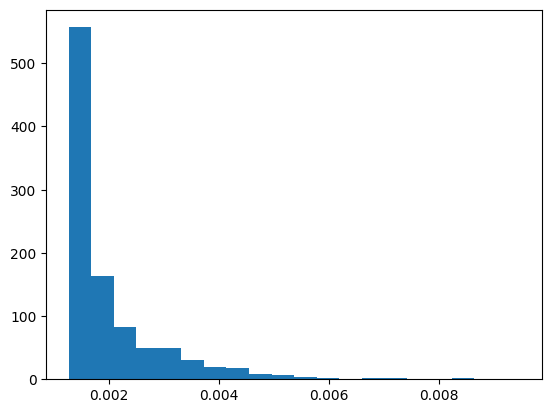

In [ ]:
from matplotlib import pyplot
pyplot.hist(mmds.numpy(), bins=20)

In [ ]:
torch.quantile(mmds, 0.95) #threshold for 5% significance

tensor(0.0040)

In [ ]:
(our_mmd < mmds).float().mean() #to get the p value

tensor(0.5480)